<a href="https://colab.research.google.com/github/Sirilak-1447/ImageProcessing/blob/main/Gq_Tongta_Khim_colorspace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path = '/content/drive/MyDrive/Khim_imageclass/'

In [ ]:
import cv2
import sys
import matplotlib.pyplot as plt

In [ ]:
img_bgr = cv2.imread(folder_path + 'img01.jpg' )
if img_bgr is None:
    print('Error:Image load failed')
    sys.exit()


In [ ]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)
img_rgba = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGBA)
img_xyz = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2XYZ)
img_rgba = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGBA)



In [ ]:
print(f'shape: RGB={img_rgb.shape}; GRAY={img_gray.shape}; HSV={img_hsv.shape};  RGBA={img_rgba.shape}')

shape: RGB=(3024, 4032, 3); GRAY=(3024, 4032); HSV=(3024, 4032, 3);  RGBA=(3024, 4032, 4)


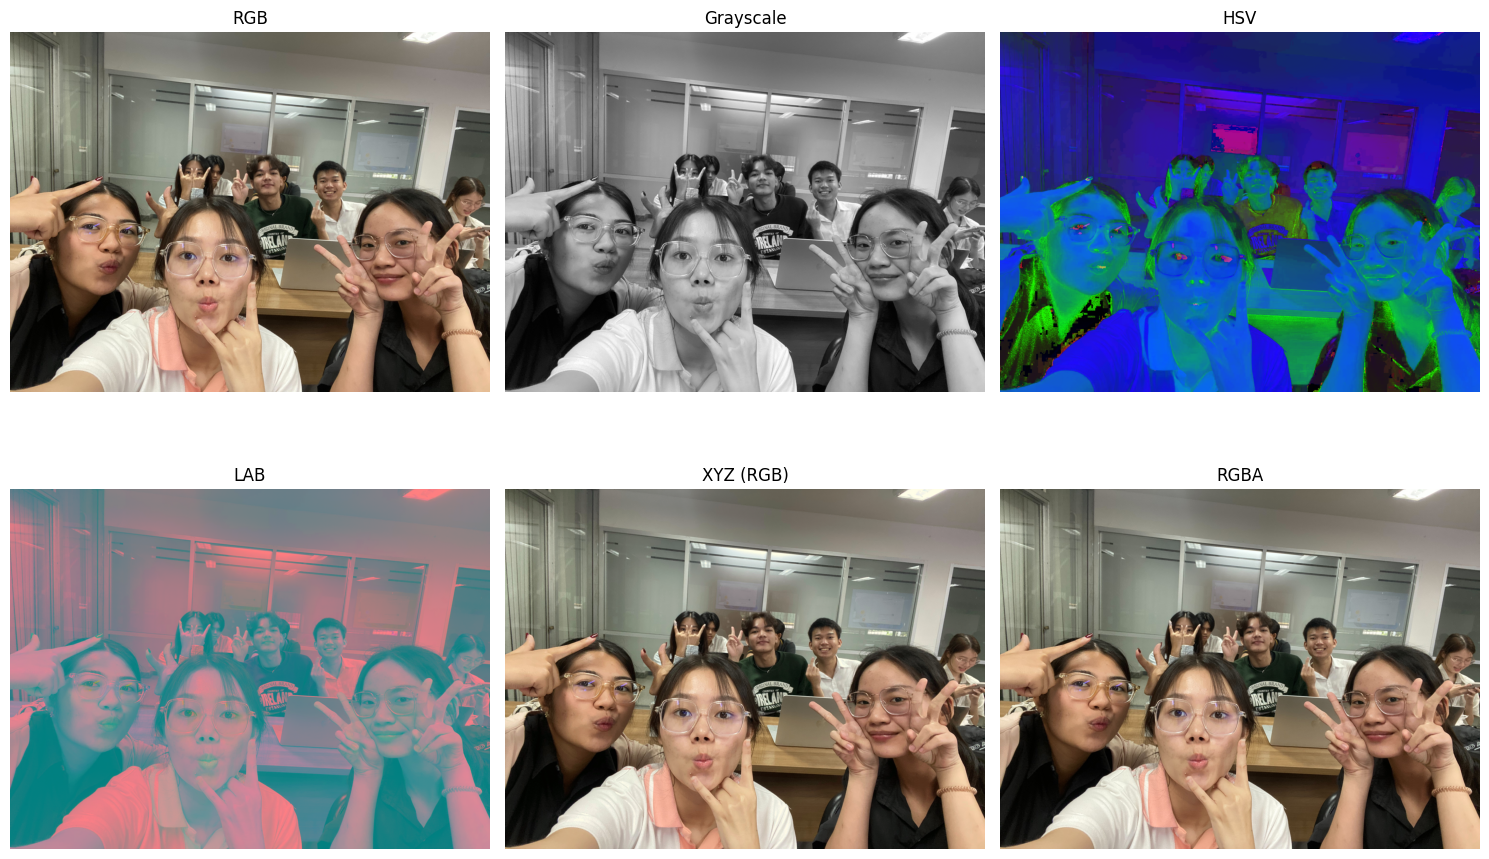

In [ ]:

img_xyz_rgb = cv2.cvtColor(img_xyz, cv2.COLOR_XYZ2RGB)

titles = ['RGB', 'Grayscale', 'HSV', 'LAB', 'XYZ (RGB)', 'RGBA']

imgs = [img_rgb, img_gray, img_hsv, img_lab, img_xyz_rgb, img_rgba]


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for ax, img, title in zip(axes.flatten(), imgs, titles):
    if len(img.shape) == 2:
        ax.imshow(img, cmap='gray')
    else:
        ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()

plt.savefig(folder_path + 'Gq_Tongta_Khim_ColorSpaces.png', bbox_inches='tight')

plt.show()

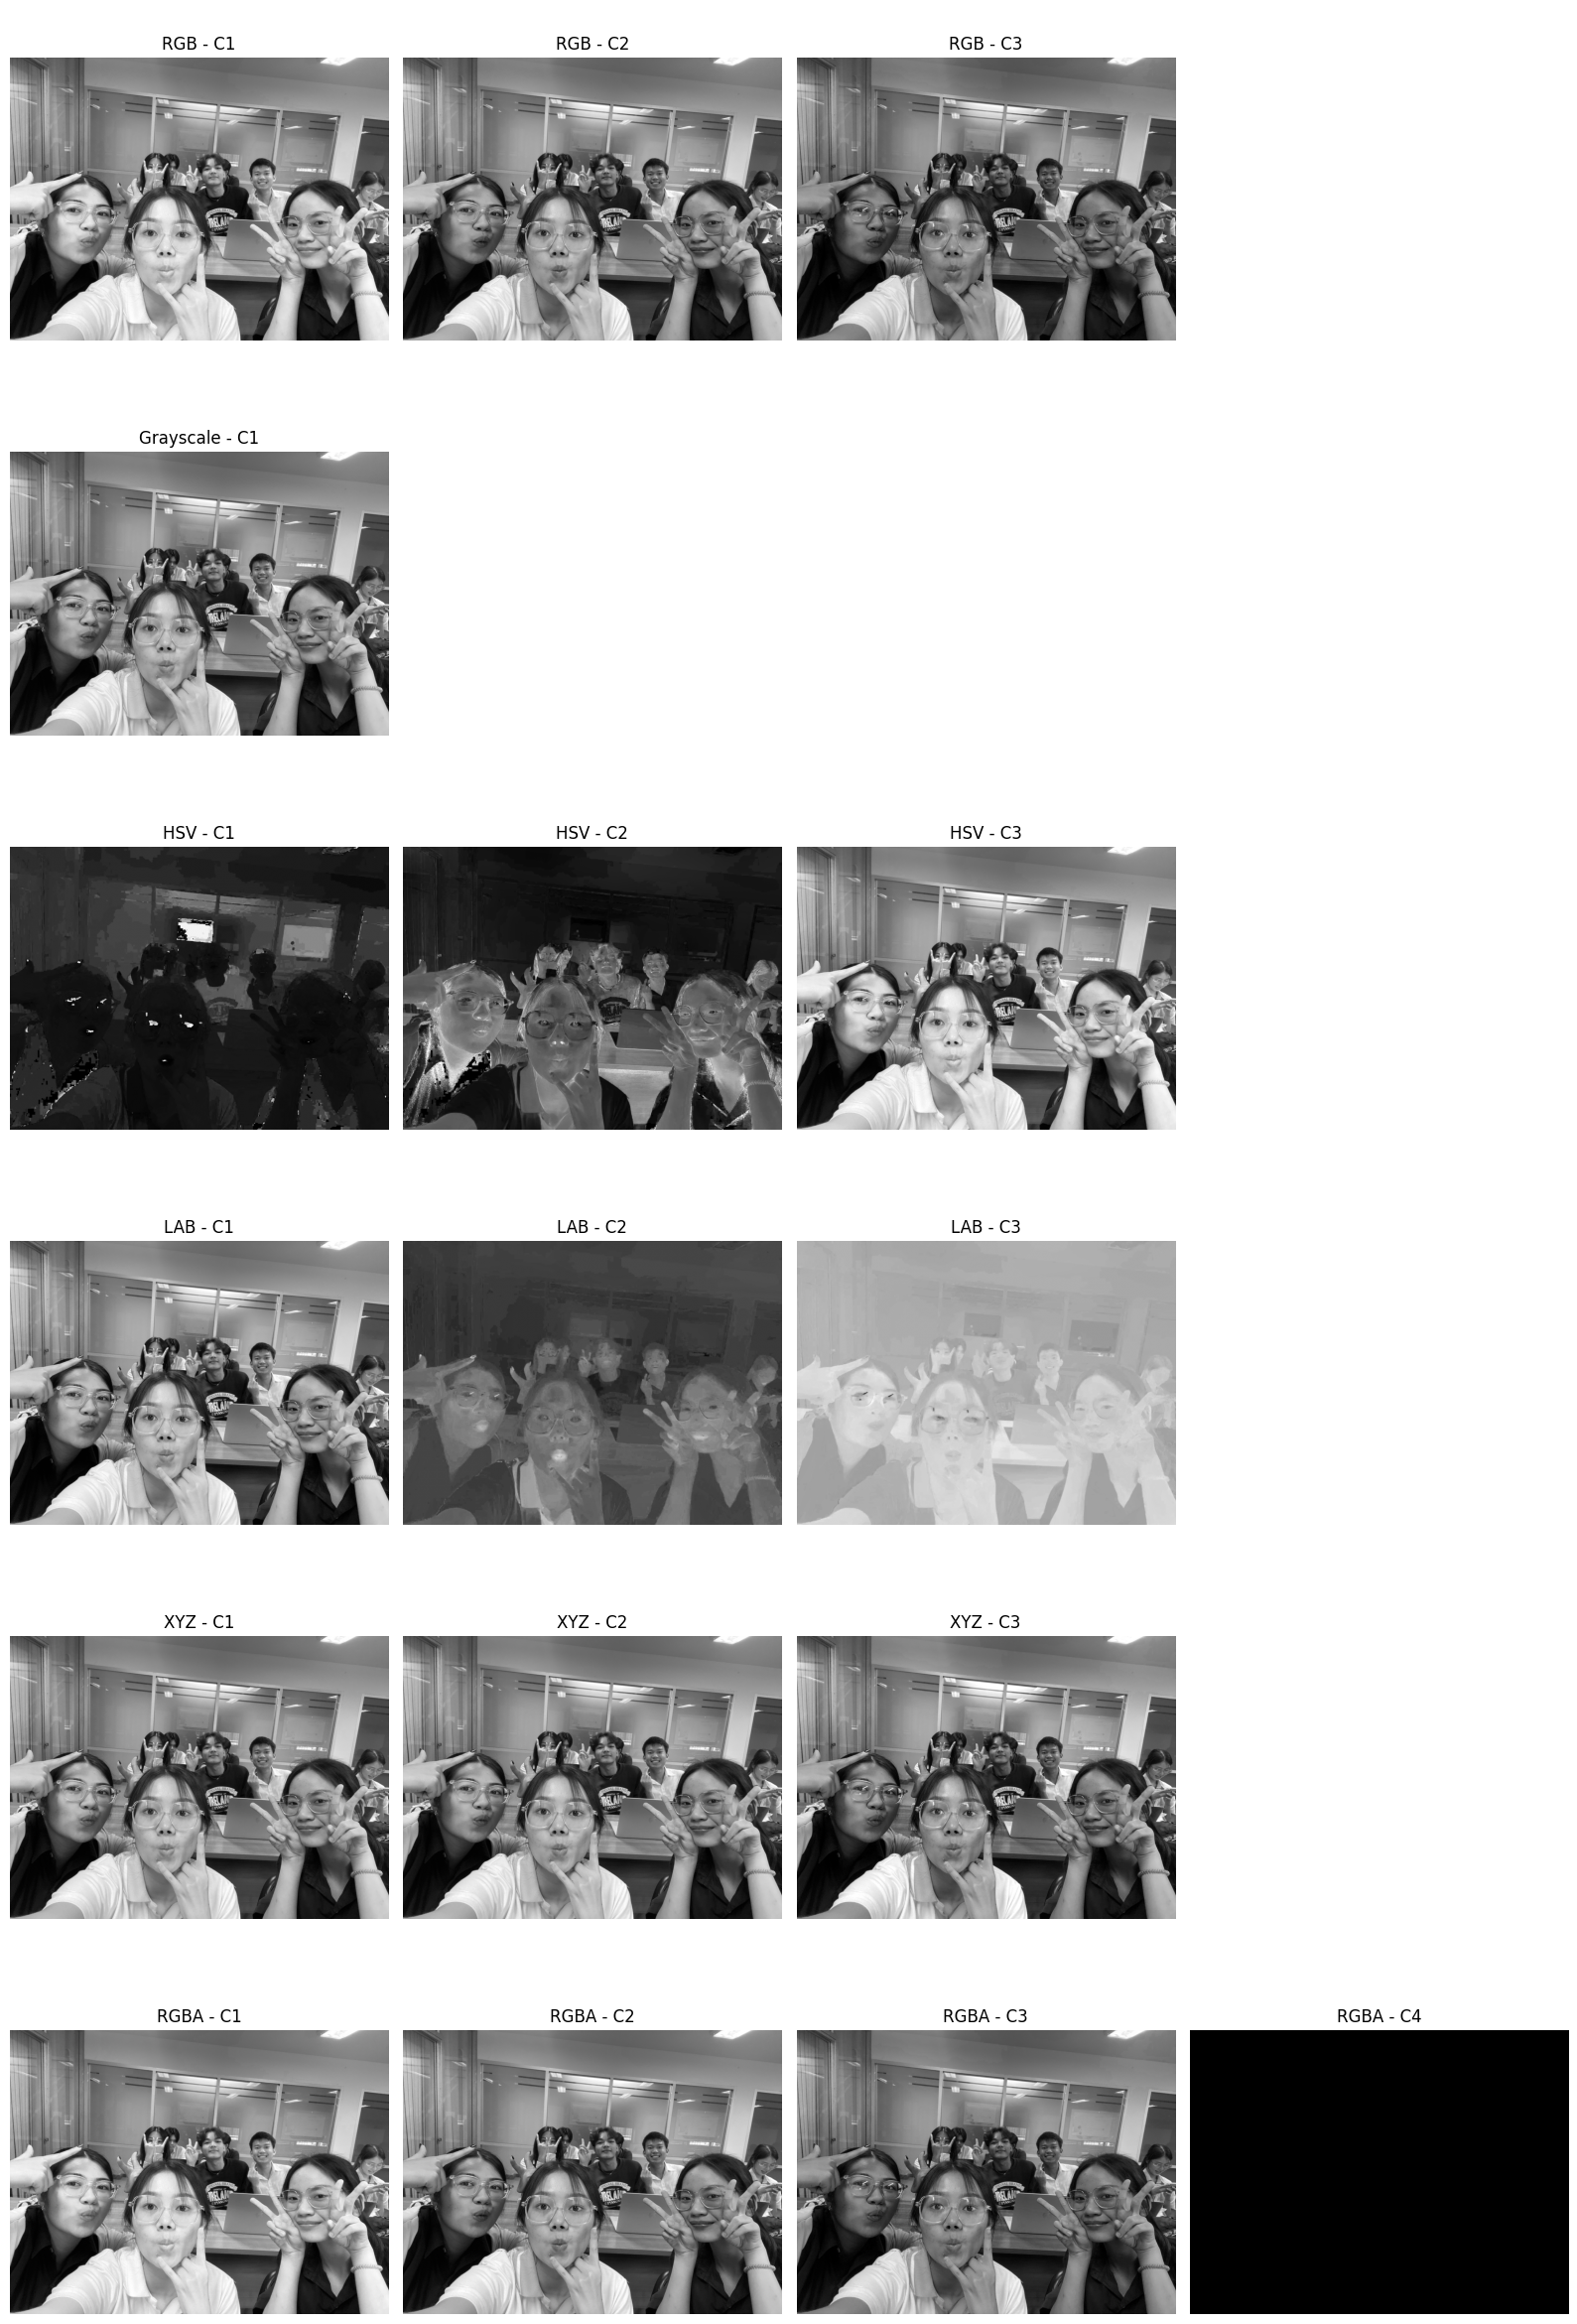

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


titles = ('RGB', 'Grayscale', 'HSV', 'LAB', 'XYZ', 'RGBA')

imgs = [img_rgb, img_gray, img_hsv, img_lab, img_xyz, img_rgba]

max_channels = max(img.shape[2] if img.ndim == 3 else 1 for img in imgs)

fig, axes = plt.subplots(nrows=len(imgs), ncols=max_channels,
                         figsize=(4 * max_channels, 4 * len(imgs)))  # (w, h) in inches

axes = np.atleast_2d(axes)

for row, (title, img) in enumerate(zip(titles, imgs)):
    channels = [img] if img.ndim == 2 else [img[:, :, i] for i in range(img.shape[2])]

    for col in range(max_channels):
        ax = axes[row, col]
        if col < len(channels):
            ax.imshow(channels[col], cmap='gray')
            ax.set_title(f'{title} - C{col+1}')
        ax.axis('off')


plt.tight_layout()
plt.savefig(folder_path + 'Gq_Tongta_Khim_Channels.png', bbox_inches='tight')
plt.show()